#### Importing Dependencies

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression

#### Data collection & Processing

In [2]:
# Loading the dataset to Pandas Dataframe

cc_df = pd.read_csv('creditcard.csv')

In [3]:
# first 5 rows of the datadet

cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Getting information about data

cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# checking the null values

cc_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# distribution of legit transaction & fraudulent transaction

cc_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

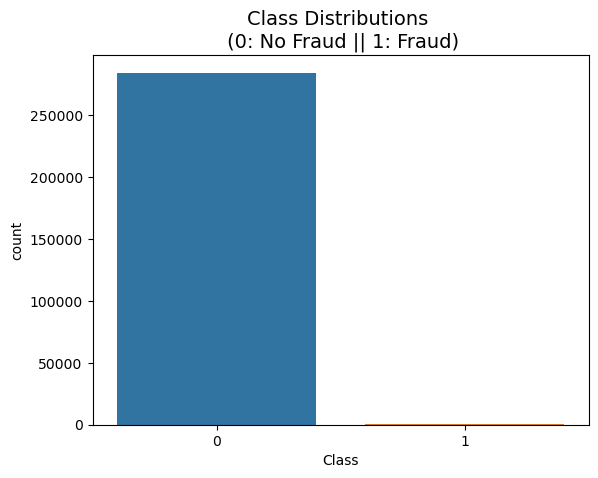

In [13]:
sns.countplot(x='Class', data=cc_df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

> Dataset is highly skewed

#### Data Analysis

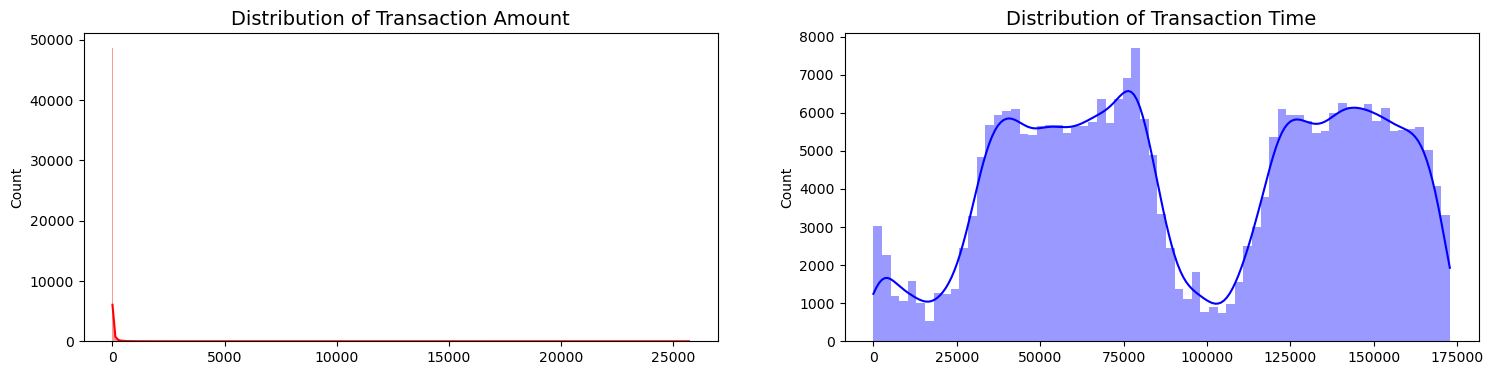

In [26]:
amount_val = cc_df['Amount'].values
time_val = cc_df['Time'].values

fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.histplot(amount_val, ax=ax[0], color='r',alpha=0.4, kde=True, linewidth=0)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)

sns.histplot(time_val, ax=ax[1], color='b', alpha=0.4, kde=True, linewidth=0)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)

plt.show()

In [27]:
# sepatating the data for analysis

legit = cc_df[cc_df.Class == 0]
fraud = cc_df[cc_df.Class == 1]

In [29]:
# Statistical measures of the data

legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [30]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [31]:
# comparing the values for both type of transaction

cc_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


> mean for fraud is greater than legit transaction

#### Under-Sampling

Build a sample dataset containing similar distribution of normal transaction and fraudulent transaction

Number of fraudulent transaction => 492

In [32]:
legit_sample = legit.sample(n=492)

In [33]:
# concatenating two dataframes

new_df = pd.concat([legit_sample, fraud], axis=0)

In [35]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
254775,156909.0,2.045405,0.201715,-1.812310,1.251014,0.733084,-0.659091,0.573312,-0.305003,0.225748,...,0.034312,0.277752,0.019179,0.602171,0.487365,-0.515212,-0.021261,-0.056452,9.90,0
48494,43670.0,1.218656,0.749431,-0.437830,1.147167,0.405216,-0.704164,0.280209,-0.142739,-0.502377,...,-0.024378,0.024257,-0.190410,-0.098652,0.743755,-0.328354,0.038522,0.046466,1.00,0
138480,82671.0,0.380372,-2.012106,1.518468,0.870512,-2.161042,0.839897,-1.032976,0.431248,1.871490,...,0.296954,0.471751,-0.425170,0.480486,0.102145,1.197605,-0.058102,0.073343,378.00,0
171400,120622.0,-0.051381,0.941162,-0.569887,-0.208470,0.403897,-1.198001,1.341323,-0.410398,0.580721,...,0.161420,0.904102,-0.140614,-0.126493,-0.357388,-0.152739,0.347678,0.017932,72.52,0
109965,71621.0,1.247584,0.226040,0.268496,0.712252,-0.518606,-1.110073,-0.016691,-0.113901,0.274466,...,-0.303643,-0.963074,0.145162,0.301731,0.160465,0.099353,-0.034276,0.028064,5.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [36]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [37]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94600.038618,0.074542,-0.014877,0.052339,-0.092880,0.070371,0.008477,0.039997,0.064158,-0.018889,...,-0.010202,0.018970,0.032779,-0.000017,-0.046913,-0.019359,-0.004097,-0.007079,-0.007447,81.806443
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


> the difference in mean values is still there

##### # Without scaled amount & time

 Splitting the data into features & target

In [38]:
X = new_df.drop(columns=['Class'])

Y = new_df['Class']

Split the data into train and test data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=17)

- function will maintain the proportion of classes in the target variable Y in the train and test sets as it was in the original dataset

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model training

> Logistic Regression

In [49]:
model = LogisticRegression()
model.fit(X_train, Y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [50]:
train_data_acc = accuracy_score(Y_train, train_pred)
test_data_acc = accuracy_score(Y_test, test_pred)

print('Accuracy score of training data: ',train_data_acc)
print('Accuracy score of test data: ',test_data_acc)

Accuracy score of training data:  0.9466327827191868
Accuracy score of test data:  0.9086294416243654


In [53]:
# Generate classification report on training data
report = classification_report(Y_train, train_pred)
print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       394
           1       0.97      0.92      0.95       393

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



In [54]:
# Generate classification report on test data
report = classification_report(Y_test, test_pred)
print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        98
           1       0.91      0.91      0.91        99

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



##### # With scaled amount & time

In [56]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [59]:
# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

new_df['scaled_amount'] = rob_scaler.fit_transform(new_df['Amount'].values.reshape(-1,1))
new_df['scaled_time'] = rob_scaler.fit_transform(new_df['Time'].values.reshape(-1,1))

new_df.drop(['Time','Amount'], axis=1, inplace=True)

In [61]:
new_df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
Class,,,,,,,,,,,,,,,,,,,,,
0,0.074542,-0.014877,0.052339,-0.092880,0.070371,0.008477,0.039997,0.064158,-0.018889,-0.108733,...,0.018970,0.032779,-0.000017,-0.046913,-0.019359,-0.004097,-0.007079,-0.007447,0.656399,0.154223
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,1.067070,-0.000617


In [62]:
X = new_df.drop(columns=['Class'])

Y = new_df['Class']

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=17)

In [64]:
model = LogisticRegression()
model.fit(X_train, Y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [65]:
train_data_acc = accuracy_score(Y_train, train_pred)
test_data_acc = accuracy_score(Y_test, test_pred)

print('Accuracy score of training data: ',train_data_acc)
print('Accuracy score of test data: ',test_data_acc)

Accuracy score of training data:  0.9580686149936467
Accuracy score of test data:  0.949238578680203


In [66]:
# Generate classification report on training data
report = classification_report(Y_train, train_pred)
print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       394
           1       0.98      0.93      0.96       393

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



In [67]:
# Generate classification report on test data
report = classification_report(Y_test, test_pred)
print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        98
           1       0.96      0.94      0.95        99

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

